# Classification project 1: Diabetes

**Team members: Ronald**<br>

### About dataset
Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

*This is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables*

The data file of the following columns:

**Diabetes_binary**
0 = no diabetes 1 = diabetes

**HighBP**
0 = no high BP 1 = high BP

**HighChol**
0 = no high cholesterol 1 = high cholesterol

**CholCheck**
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

**BMI**
Body Mass Index

**Smoker**
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

**Stroke**
(Ever told) you had a stroke. 0 = no 1 = yes

**HeartDiseaseorAttack**
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

**PhysActivity**
physical activity in past 30 days - not including job 0 = no 1 = yes

**Fruits**
Consume Fruit 1 or more times per day 0 = no 1 = yes 

**Veggies**
Consume Vegetables 1 or more times per day 0 = no 1 = yes

**HvyAlcoholConsump**
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

**AnyHealthcare**
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

**NoDocbcCost**
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

**GenHlth**
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

**MentHlth**
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

**PhysHlth**
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

**DiffWalk**
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

**Sex**
0 = female 1 = male

**Age**
13-level age category (AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

**Education**
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

**Income**
Income scale (INCOME2 see codebook) scale 1-8. 1 = less than 10k USD; 5 = less than 35k USD; 8 = 75k+ USD 

In [1]:
# reference to the data
data_file = './data/diabetes_binary_health_indicators_BRFSS2015.csv'

## Imports and settings

In [2]:
# imports
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# import my personal library
sys.path.insert(0, '../../ronaldlib/')
import ronaldlib.utils as rutils

# settings
pd.options.display.float_format = "{:.2f}".format

## Data loading

In [3]:
# load the data
df = rutils.load_data(data_file)

loading data from pickle file...
data loaded (took 0.0 seconds)


## Identify features and labels

In [4]:
# show some column info
rutils.show_column_info(df, show_centrality_and_dispersion=True)

            COLUMN     TYPE  VALID CNT  MISSING CNT  UNIQUE CNT
0   Diabetes_bi...  float64     253680            0           2
1           HighBP  float64     253680            0           2
2         HighChol  float64     253680            0           2
3        CholCheck  float64     253680            0           2
4           Smoker  float64     253680            0           2
5           Stroke  float64     253680            0           2
6   HeartDiseas...  float64     253680            0           2
7     PhysActivity  float64     253680            0           2
8           Fruits  float64     253680            0           2
9          Veggies  float64     253680            0           2
10  HvyAlcoholC...  float64     253680            0           2
11   AnyHealthcare  float64     253680            0           2
12     NoDocbcCost  float64     253680            0           2
13        DiffWalk  float64     253680            0           2
14             Sex  float64     253680  

## Encoding data Categorical to numerical/ordinal (if needed)
All columns are already numerical, so we don't need to do anything

## Visualizing the columns

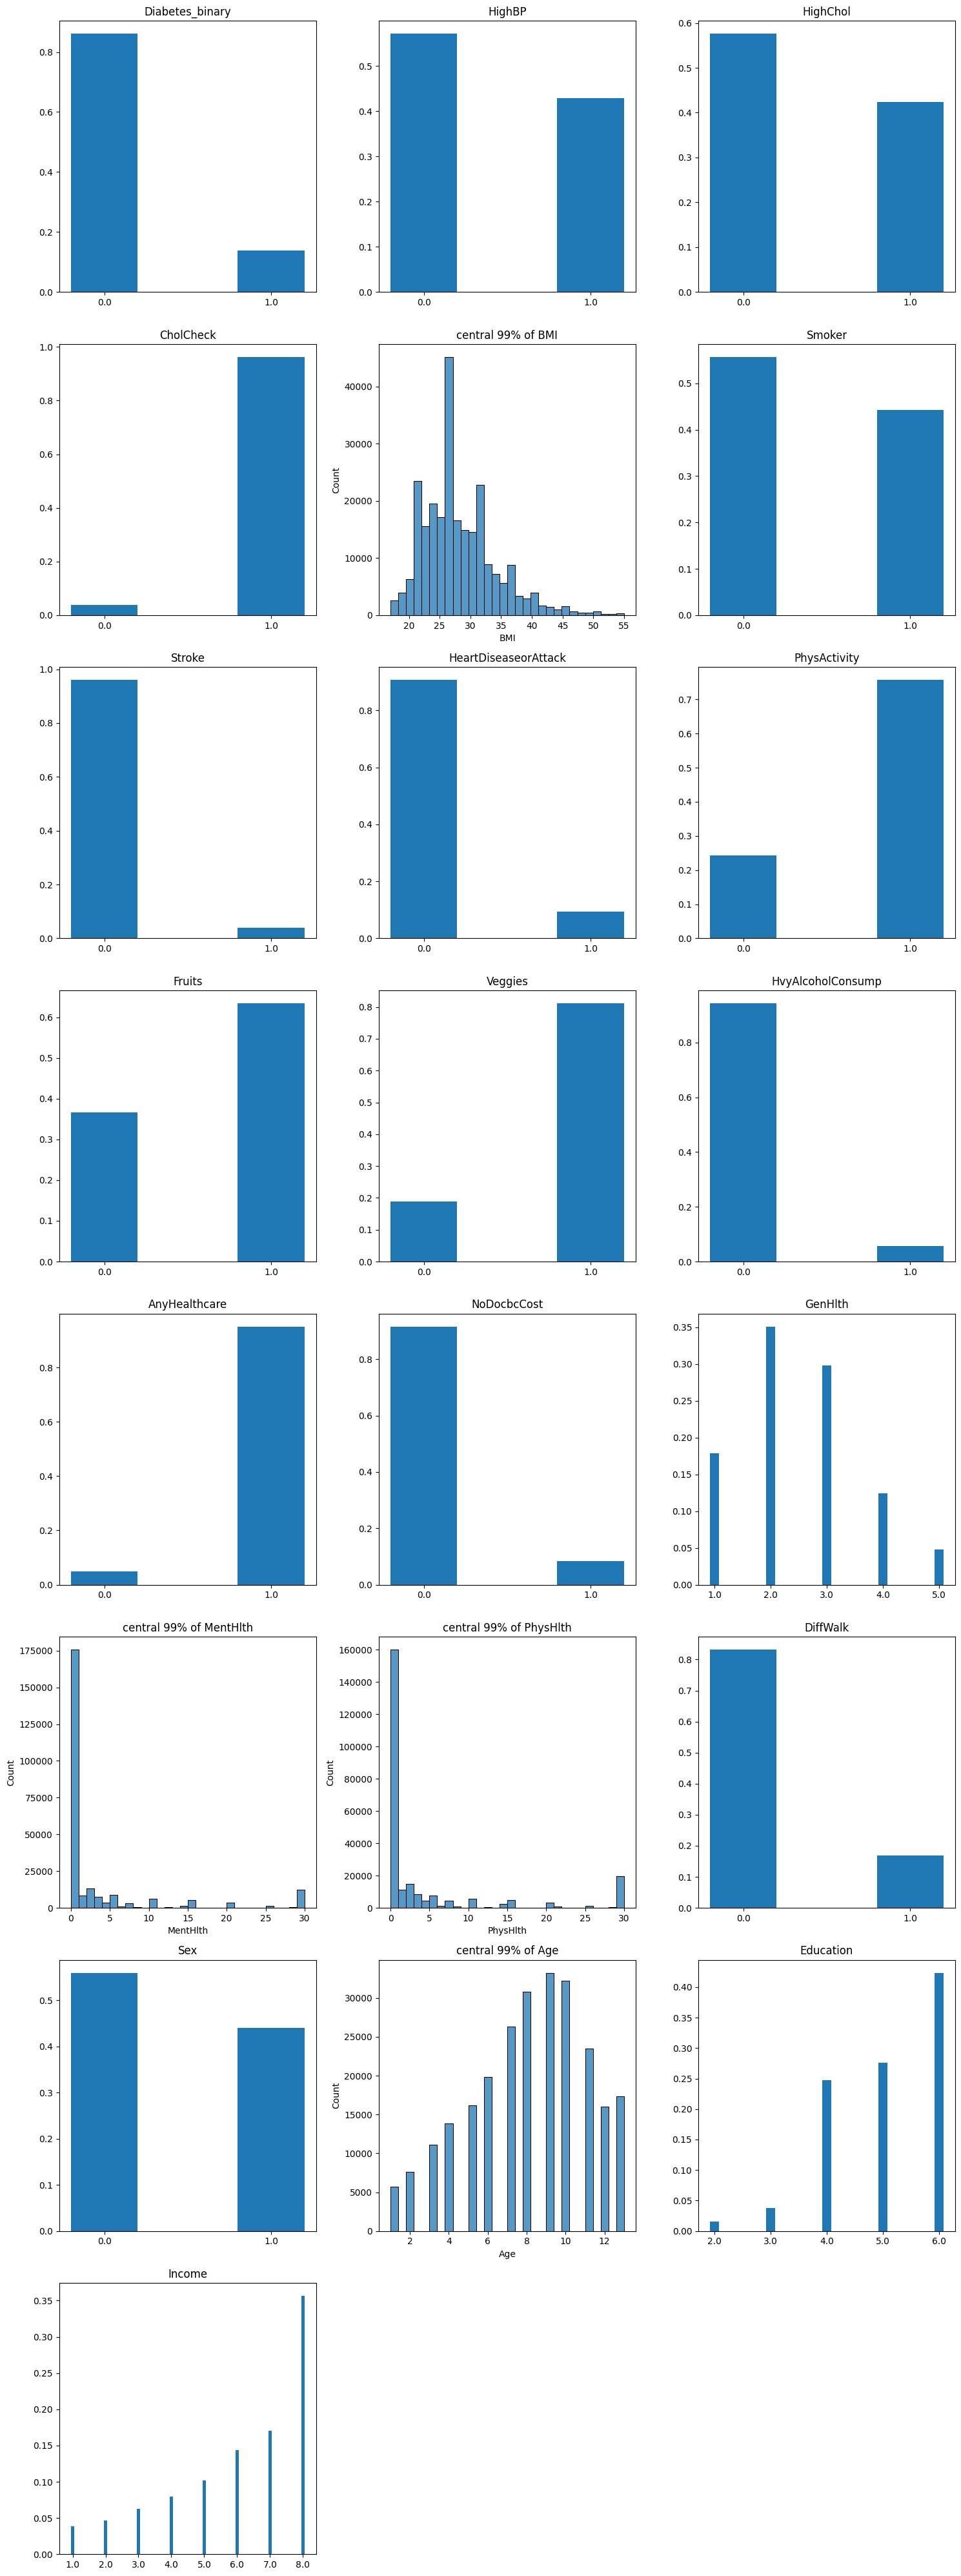

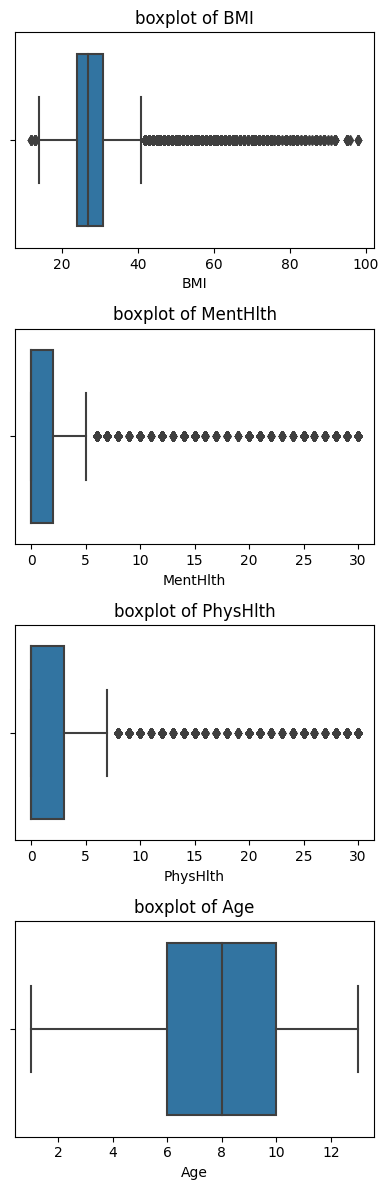

In [5]:
# create a histogram for each numeric column
rutils.create_column_histograms(df, hist_tail_cut=1)

# boxplots
rutils.create_column_boxplot(df, separate_panels=True)

## Identifying/correcting errors (if needed)
There are no signs of errors, so nothing needs to be corrected

## Filling/removing missing values (if needed)
There are no missing values, so nothing needs to be done here

## Removing outliers (if needed)
The box plots show outliers in three variables:

**BMI**<br>
The distribution has a very long positive tail. While the values are likely to be valid, the heavy tails may negatively affect classifier training. Therefore, we will log-transform this column, rather than remove outliers.

**PhysHlth**<br>
The large majority of people has 0 days of poor physical health in the past 30 days. For the remaining cases, the distribution is almost uniform between 1 and 30. Hence, this looks like a bimodal distribution (delta distribution mixed with a uniform distribution) in which neither of the separate components has outliers. Hence, we will not remove anything.

**MentHlth**<br>
Same story as PhysHlth

## Log-transform BMI

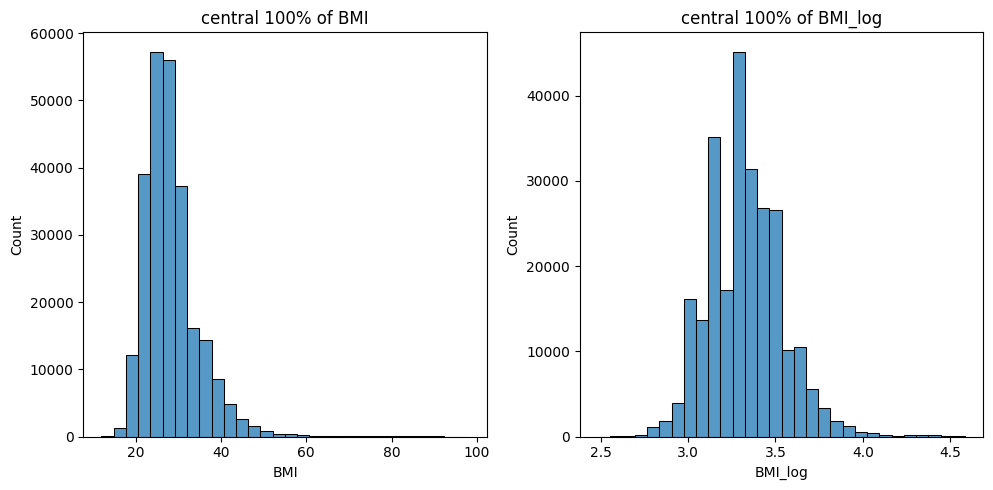

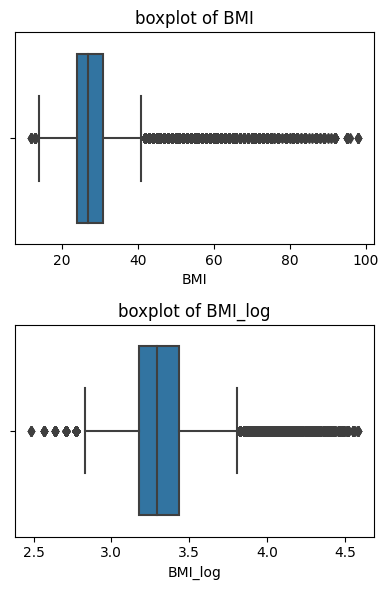

In [6]:
df['BMI_log'] = np.log(df['BMI'])
    
# visualize 
rutils.create_column_histograms(df[['BMI','BMI_log']], hist_tail_cut=0)
rutils.create_column_boxplot(df[['BMI','BMI_log']], separate_panels=True)

In [7]:
# drop redundant BMI column
df = df.drop('BMI', axis=1)

## Analyze relationships between features (correlation matrix)

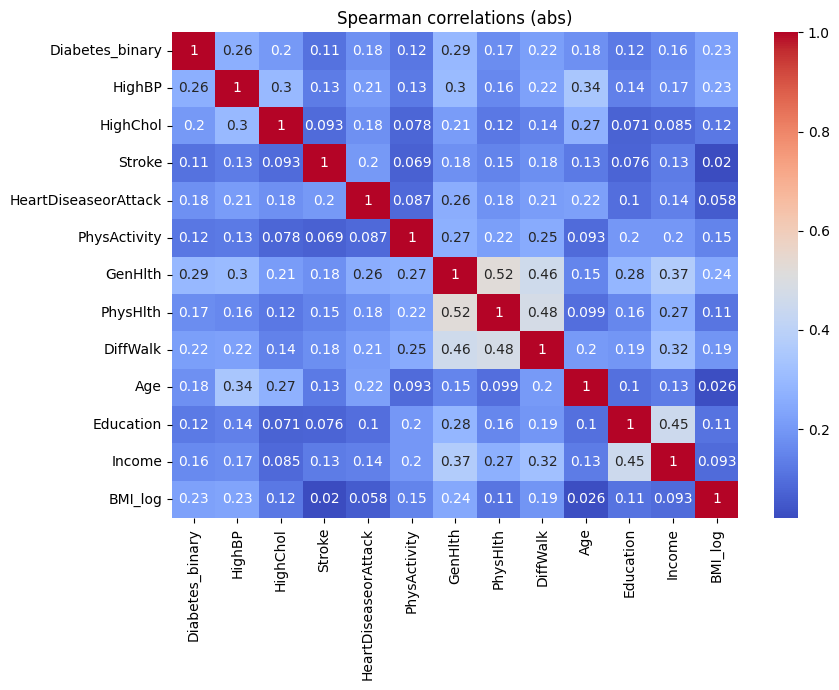

In [8]:
rutils.create_corr_plot(df, target_col='Diabetes_binary', threshold=0.1, take_abs=True)

## Visualize the relation between the target (tip amount) and each feature

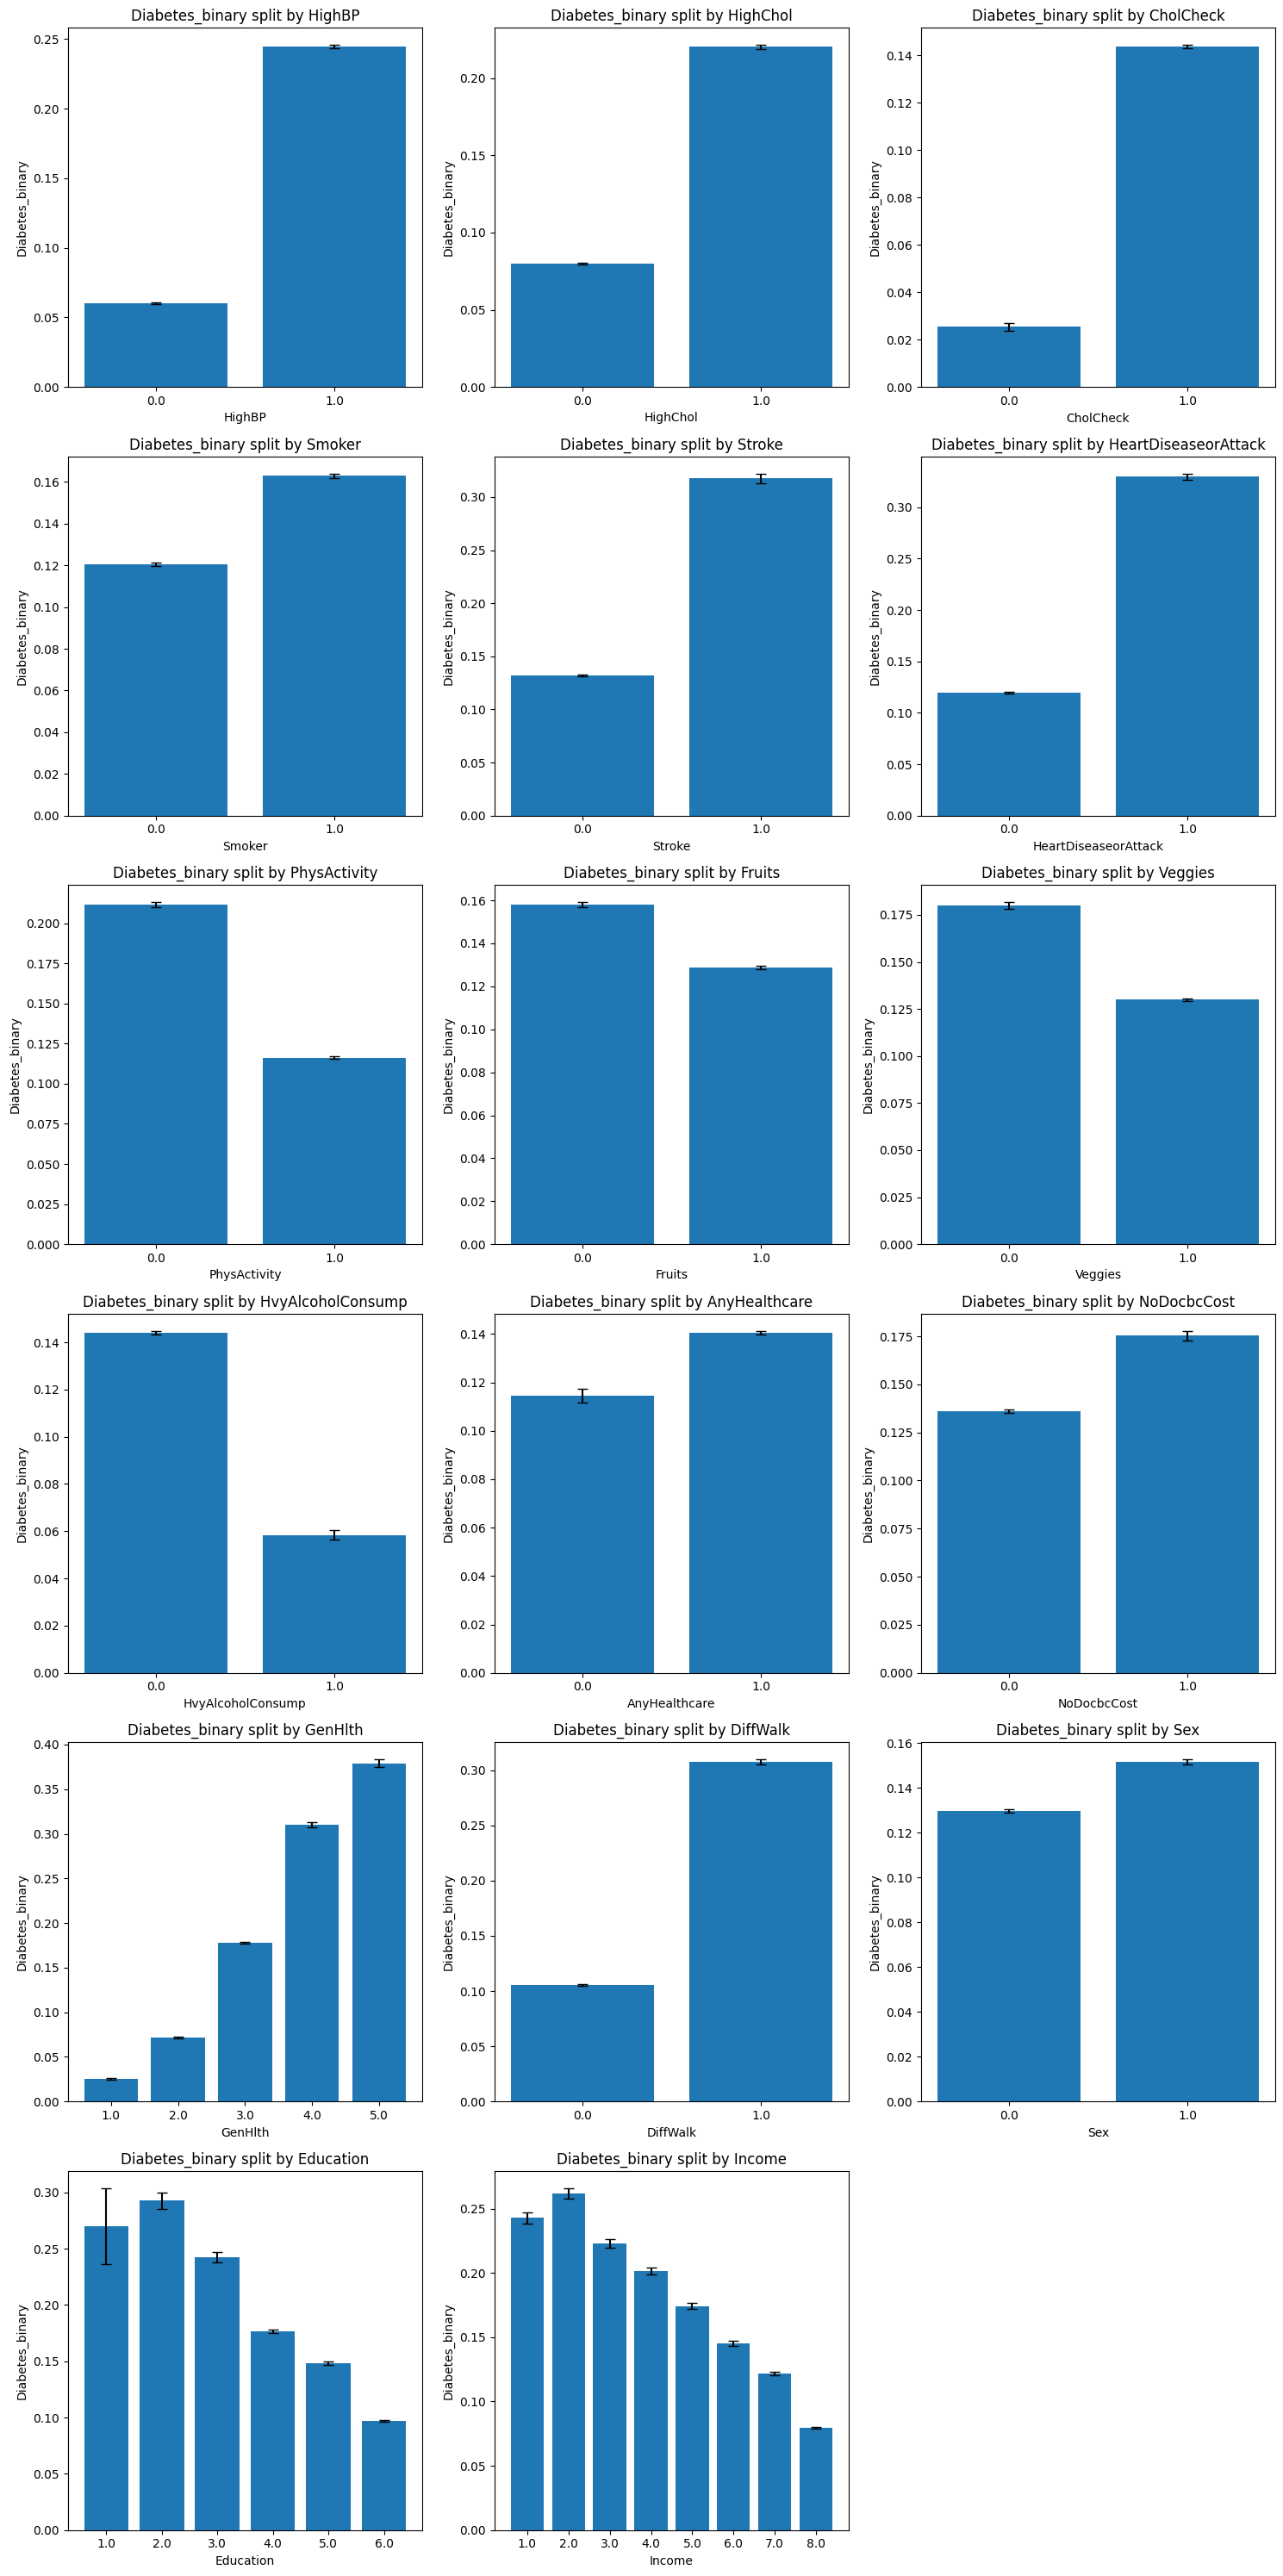

In [9]:
rutils.plot_target_split_by_categorical(df, 'Diabetes_binary')

## Rank the features using Random Forest

In [10]:
# settings
target_var = 'Diabetes_binary'
feature_vars = [col for col in df.columns if col != target_var]
sample_size = 10000

# perform stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=sample_size, random_state=20230629)
for _, sample_index in sss.split(df[feature_vars], df[target_var]):
    sample_features = df[feature_vars].iloc[sample_index]
    sample_target = df[target_var].iloc[sample_index]

# rank the features using a Random Forest
rf = RandomForestRegressor(n_jobs=-1, random_state=20230629)
rf.fit(sample_features, sample_target)
imps_RF = rf.feature_importances_

# Create and sort DataFrame
imps_df = pd.DataFrame({
    'Feature': feature_vars,
    'Importance_RF': imps_RF
})
imps_df = imps_df.sort_values(by='Importance_RF', ascending=False)

imps_df

,Feature,Importance_RF
20,BMI_log,0.16
17,Age,0.12
12,GenHlth,0.10
19,Income,0.10
14,PhysHlth,0.08
18,Education,0.07
13,MentHlth,0.06
0,HighBP,0.04
1,HighChol,0.03
3,Smoker,0.03


## Use certain features not all the features (up to you to choose the features)
Since the goal is to maximize accuracy, we will keep all features for now (theoretically, the maximum accuracy can only get worse when dropping features; it cannot get better -- this follows from something called *data processing inequality*)

If that turns out to be computationally prohibitive, we will drop features until the analysis is doable.

## Split and then Resample the Training Data

In [11]:
# split into train and test data
df_train, df_test = train_test_split(df, test_size=0.3, random_state=20230629)
X_train = df_train.drop('Diabetes_binary', axis=1)
y_train = df_train['Diabetes_binary']
X_test = df_test.drop('Diabetes_binary', axis=1)
y_test = df_test['Diabetes_binary']

# resample the train data
resampler = SMOTEENN(sampling_strategy = 'all', random_state = 20230630)
resampler.fit(X_train, y_train)
Xr, yr = resampler.fit_resample(X_train, y_train)

## Use different base models, use RandomizedSearchCV, use a pipeline
I will try the following three commonly used regression models:
1. Logistic regression
2. Random forest classification
3. K nearest neighbours

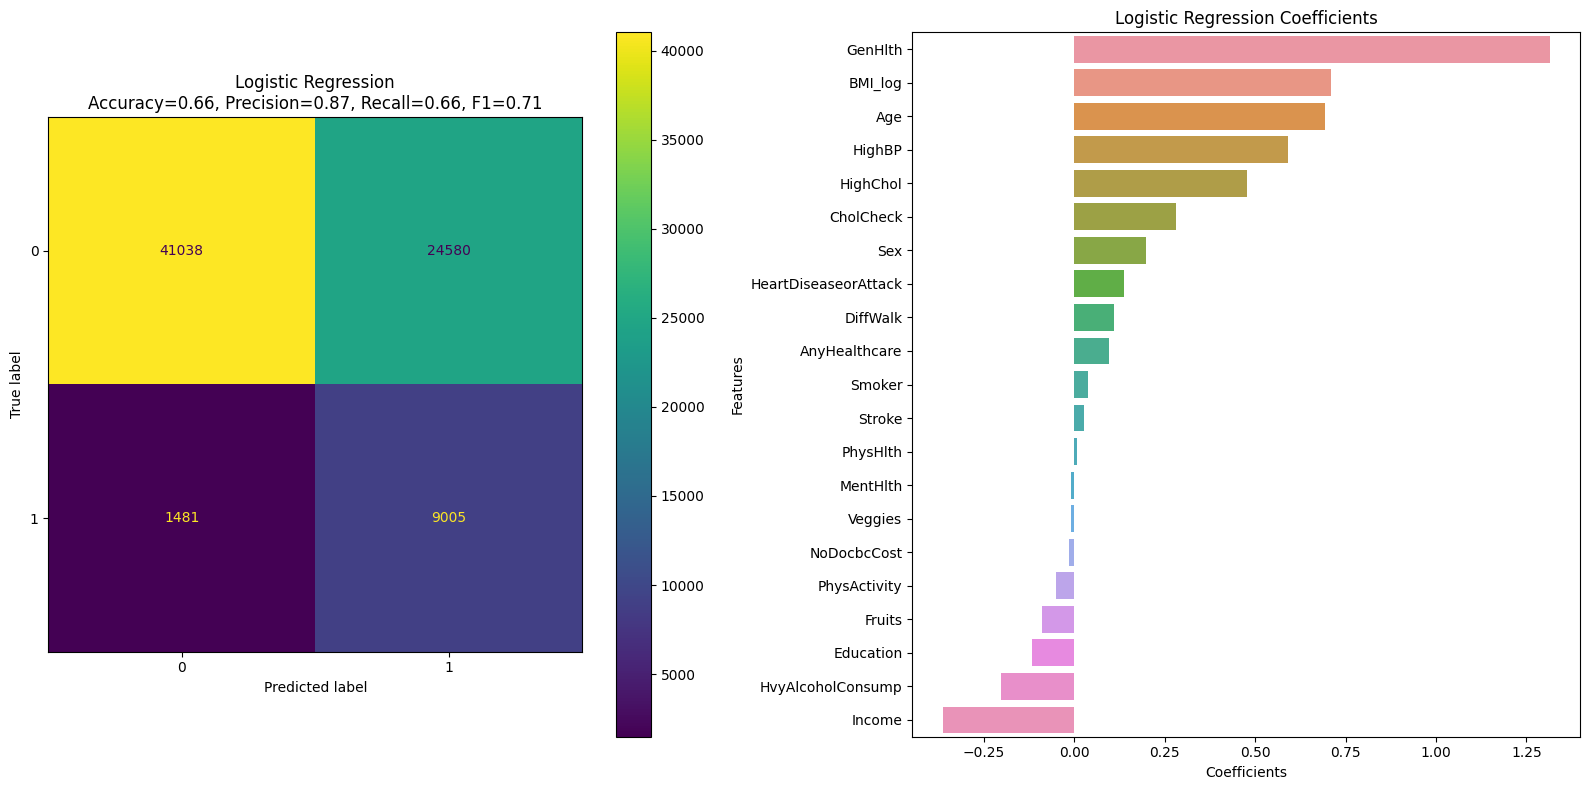

C:\Users\ROVA8087\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


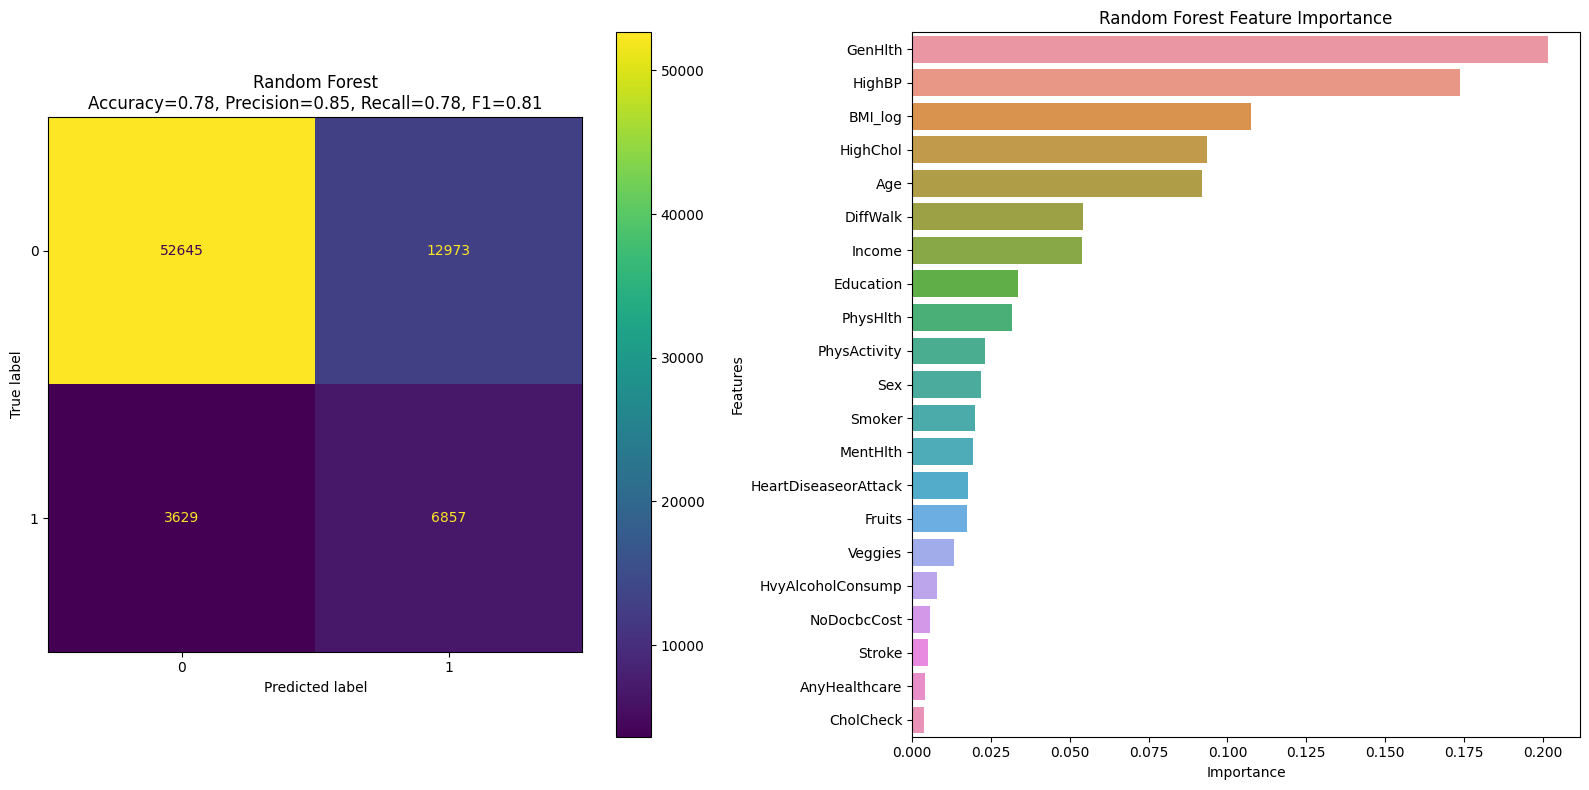

KeyError: 'KNN'

In [12]:
# max search iterations
max_search_iter = 200

# models
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=20230629)),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=20230629)),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Gradient Boosting': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=20230629))
}

# hyperparameter spaces
param_distributions = {
    'Logistic Regression': { 
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__fit_intercept': [True, False]
    },
    'Random Forest': {
        'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 10, 20, 30],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__max_features': ['auto', 'sqrt']
    },
    'Gradient Boosting': {
        'gradientboostingclassifier__n_estimators': [100, 200, 300],
        'gradientboostingclassifier__learning_rate': [0.1, 0.01, 0.001],
        'gradientboostingclassifier__max_depth': [3, 5, 10]
    }
}

# loop over models
best_hyperpars = []  # store best hyperparameters for later use in the ensemble modeling
for name, model in models.items():

    # fit the model (find best hyperparameter values)
    n_combinations = len(list(itertools.product(*param_distributions[name].values())))
    random_search = RandomizedSearchCV(estimator=model, 
                                       param_distributions=param_distributions[name], 
                                       n_iter=min(max_search_iter, n_combinations), 
                                       cv=5,
                                       n_jobs=-1, 
                                       scoring='accuracy', 
                                       random_state=20230629)
    random_search.fit(Xr, yr)
    best_hyperpars.append((name, random_search.best_estimator_))

    # compute predictions and classification metrics
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # create a figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax=ax[0])
    ax[0].set_title(f'{name}\nAccuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}')

    # get the model from the pipeline
    model_name = list(best_model.named_steps.keys())[-1]

    # display feature importance or coefficients for models
    if name == 'Logistic Regression':
        feature_coefs = best_model.named_steps[model_name].coef_[0]
        features = X_train.columns
        coef_df = pd.DataFrame({'Features': features, 'Coefficients': feature_coefs})
        coef_df.sort_values(by='Coefficients', ascending=False, inplace=True)
        sns.barplot(x='Coefficients', y='Features', data=coef_df, ax=ax[1])
        ax[1].set_title(f'{name} Coefficients')
    elif name in ['Random Forest', 'Gradient Boosting']:
        feature_importances = best_model.named_steps[model_name].feature_importances_
        features = X_train.columns
        importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
        importance_df.sort_values(by='Importance', ascending=False, inplace=True)
        sns.barplot(x='Importance', y='Features', data=importance_df, ax=ax[1])
        ax[1].set_title(f'{name} Feature Importance')
    elif name == 'KNN':
        ax[1].set_title('KNN does not provide feature importance')

    plt.tight_layout()
    plt.show()

## Use ensembling techniques to see if there is any improvement in the overall accuracy.

In [ ]:
# create an ensemble of the best models
ensemble = VotingClassifier(estimators=best_hyperpars, voting='soft')

# fit the ensemble model
ensemble.fit(Xr, yr)

# compute predictions and error measures (accuracy, precision, recall, and f1)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax)
ax.set_title(f'Ensemble\nAccuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}')

plt.show()
